1/1 [==============================] - 1s 955ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 512, 512, 1)


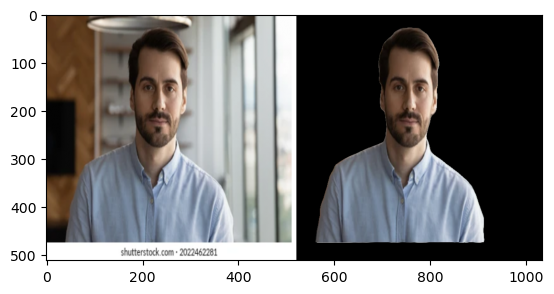

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import CustomObjectScope
import numpy as np
from tensorflow.keras import backend as K
from metrics import dice_loss, dice_coef, iou
import cv2

""" Loading model """
with CustomObjectScope({'iou': iou, 'dice_coef': dice_coef, 'dice_loss': dice_loss}):
    model = tf.keras.models.load_model("model.h5")

img = cv2.imread('image2.png', cv2.IMREAD_COLOR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



img = cv2.resize(img, (512, 512))
img = img/255.0

predictions = model.predict(np.expand_dims(img, 0))
y = predictions[0]
masked_image = img * y
line = np.ones((512, 10, 3)) * 128
cat_images = np.concatenate([img, line, masked_image], axis=1)

print(predictions.shape)
plt.imshow(cat_images)

In [38]:

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

2024-04-13 23:39:59.593880: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,?,?]
	 [[{{node inputs}}]]
2024-04-13 23:39:59.646907: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,?,?]
	 [[{{node inputs}}]]
2024-04-13 23:39:59.714118: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,?,?]
	 [[{{node inputs}}]]
2024-04-13

INFO:tensorflow:Assets written to: /var/folders/gj/bxnhxpjn0dl89lcf34c8qqp00000gn/T/tmptx4_7wgj/assets


INFO:tensorflow:Assets written to: /var/folders/gj/bxnhxpjn0dl89lcf34c8qqp00000gn/T/tmptx4_7wgj/assets
2024-04-13 23:41:10.959950: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-04-13 23:41:10.960135: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-04-13 23:41:10.962092: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/gj/bxnhxpjn0dl89lcf34c8qqp00000gn/T/tmptx4_7wgj
2024-04-13 23:41:11.002917: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2024-04-13 23:41:11.002945: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/gj/bxnhxpjn0dl89lcf34c8qqp00000gn/T/tmptx4_7wgj
2024-04-13 23:41:11.184028: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-04-13 23:41:12.666072: I tensorflow/cc/saved_model/loader.cc:215] Running initialization

71275192

INFO: Applying 1 TensorFlow Lite delegate(s) lazily.
INFO: Failed to apply the default TensorFlow Lite delegate indexed at 0 because of incompatibility between runtime and delegate. Ignoring the error, and continuing anyway.


<class 'numpy.ndarray'>


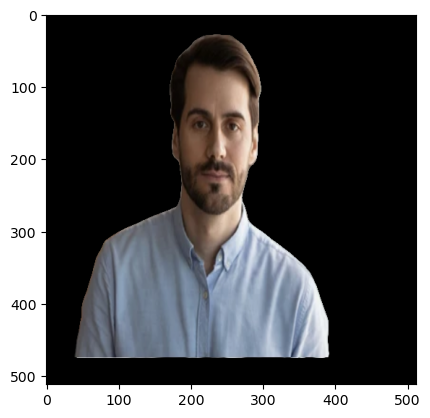

In [26]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="converted_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test model on random input data.
input_shape = input_details[0]['shape']
inp = np.expand_dims(img, 0).astype('float32')
print(type(inp))
interpreter.set_tensor(input_details[0]['index'], inp)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
y = interpreter.get_tensor(output_details[0]['index'])[0]
output = img * y
plt.imshow(output)